In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\tr21\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Delhi-Metro-Network.csv')
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [3]:
df.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [4]:
df.dtypes

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [5]:
df['Opening Date']=pd.to_datetime(df['Opening Date'])

In [7]:
df['Line'].unique()

array(['Red line', 'Pink line', 'Rapid Metro', 'Magenta line',
       'Blue line', 'Aqua line', 'Voilet line', 'Yellow line',
       'Green line', 'Gray line', 'Orange line', 'Green line branch',
       'Blue line branch'], dtype=object)

In [8]:
line_color={
    'Red line':'red',
    'Pink line':'pink',
    'Rapid Metro':'black',
    'Magenta line':'brown',
    'Blue line':'blue',
    'Aqua line':'lightblue',
    'Voilet line':'violet',
    'Yellow line':'yellow',
    'Green line':'green',
    'Gray line':'gray',
    'Orange line':'Orange',
    'Green line branch':'lightgreen',
    'Blue line branch':'cadetblue'
    
}

In [16]:
# Visualizing the locations of the metro stations on a map. It will give us an insight into the geographical distribution of the stations across Delhi

import folium
delhi_map=folium.Map(location=[28.7041, 77.1025],zoom_start=11)

for index,row in df.iterrows():
    line=row['Line']
    color=line_color[line]
    folium.Marker(
        location=[row['Latitude'],row['Longitude']],
        popup=row['Station Name'],
        tooltip=row['Station Name'],
        icon=folium.Icon(color=color)
    ).add_to(delhi_map)
    
delhi_map

C:\Users\tr21\AppData\Local\Temp\ipykernel_22452\424925679.py:11: UserWarning: color argument of Icon should be one of: {'darkred', 'lightred', 'red', 'cadetblue', 'black', 'lightgray', 'blue', 'white', 'orange', 'lightblue', 'beige', 'pink', 'darkpurple', 'darkgreen', 'purple', 'green', 'gray', 'darkblue', 'lightgreen'}.
  icon=folium.Icon(color=color)


In [21]:
# Extract the year from the Opening Date and then count the number of stations opened each year. 

df['opening year']=df['Opening Date'].dt.year
stations_per_year=df['opening year'].value_counts().sort_index().reset_index()

In [23]:
stations_per_year.columns=['Year','No of Stations']

In [24]:
stations_per_year

,Year,No of Stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


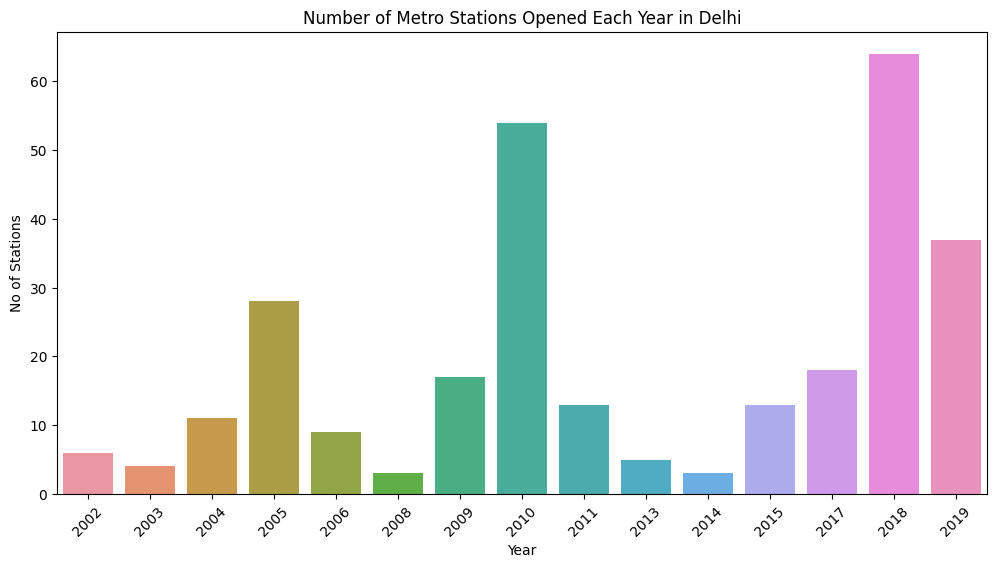

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='No of Stations',data=stations_per_year)
plt.title('Number of Metro Stations Opened Each Year in Delhi')
plt.xticks(rotation=45)
plt.show()

In [30]:
total_distance=df.groupby('Line')['Distance from Start (km)'].max()
total_distance

Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [33]:
station_per_line=df['Line'].value_counts().sort_index()
station_per_line

Aqua line            21
Blue line            49
Blue line branch      8
Gray line             3
Green line           21
Green line branch     3
Magenta line         25
Orange line           6
Pink line            38
Rapid Metro          11
Red line             29
Voilet line          34
Yellow line          37
Name: Line, dtype: int64

In [53]:
avg_distance=total_distance/(station_per_line-1)
avg_distance=pd.DataFrame(avg_distance,columns=['Average Distance'])
avg_distance=avg_distance.reset_index()
avg_distance

,Line,Average Distance
0,Aqua line,1.355000
1,Blue line,1.097917
2,Blue line branch,1.157143
3,Gray line,1.950000
4,Green line,1.240000
5,Green line branch,1.050000
6,Magenta line,1.379167
7,Orange line,4.160000
8,Pink line,1.421622
9,Rapid Metro,1.000000


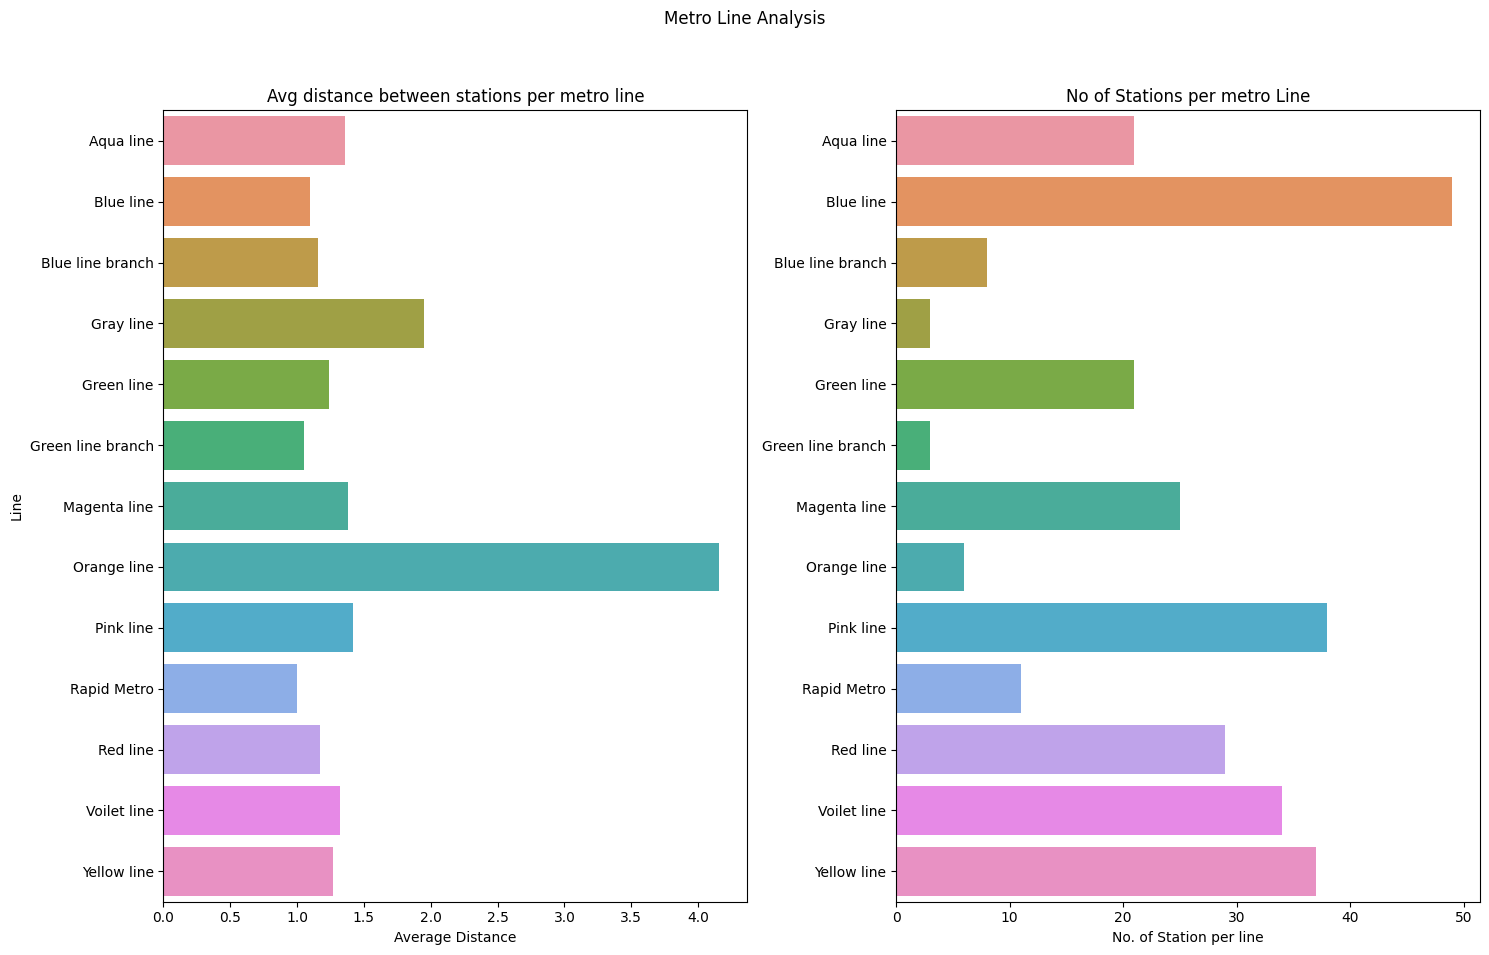

In [64]:
# Create two plots: one for the number of stations per line and another for the average distance between stations

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Average Distance',y='Line',data=avg_distance)
plt.title('Avg distance between stations per metro line')
plt.subplot(1,2,2)
sns.barplot(x=station_per_line.values,y=station_per_line.index)
plt.xlabel('No. of Station per line')
plt.title('No of Stations per metro Line')
plt.suptitle('Metro Line Analysis')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [65]:
# Calculate the frequency of each layout type and then visualize these frequencies to get a clearer picture of the layout distribution.

layout_count=df['Station Layout'].value_counts()

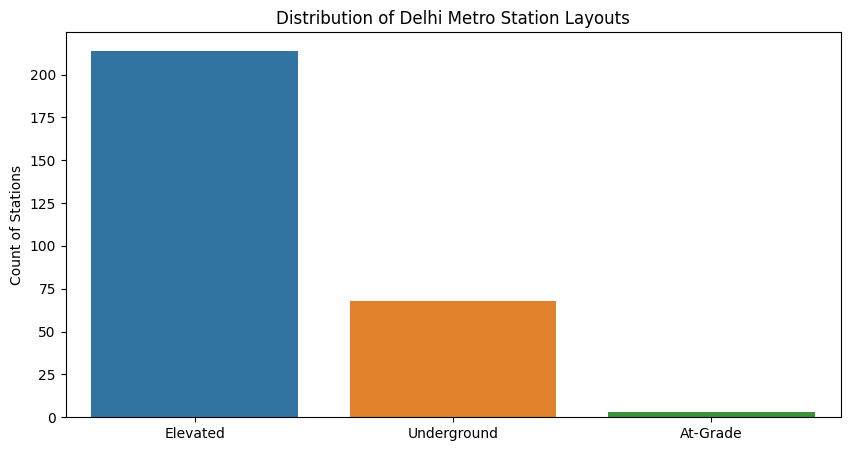

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x=layout_count.index,y=layout_count.values)
plt.title('Distribution of Delhi Metro Station Layouts')
plt.ylabel('Count of Stations')
plt.show()